In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# Loading the dataset
df = pd.read_csv('/content/train_nykaa_review_sentiment.csv')

In [3]:
# EDA
df.head()

,Reviews
0,Nice shopping app
1,Nykaa you yuyz are not giving my reward points...
2,Love it
3,Is cod available?
4,Its awesome


In [4]:
df.isnull().sum()

Reviews    3
dtype: int64

In [5]:
data = df.dropna()

In [6]:
data.duplicated().sum()

56949

In [7]:
data = data.drop_duplicates()


In [8]:
data = data.sample(frac = 0.1, random_state = 200)


In [9]:
data =[Reviews.strip() for Reviews in data .Reviews]
data =[Reviews for Reviews in data  if Reviews]
data [0:10]


['Love the offers you provide...happy wallet❤',
 'Good app for online cosmetics products....i jst love nykaa',
 'one of the best app to buy makeup in India. should include more brands.',
 'nykaa products is too good .... no compromise for quality ..',
 'GREAT APP I LOVE IT',
 'Loved the app. The products and services are too good.',
 'Worst app ever i used.plz i m requesting to dont do shopping from this app..',
 'Loved this app n the services of Nykaa. Hassle free shopping with amazing products, good prices n fast delivery within 48 hours.',
 'Fast delivery,  packaging is good 👍👍👍👍 Happy Customer',
 'There have been multiple instances wherr I was billed incorrectly and no \nreaponse is given after raising the issue']

In [10]:
# Joining the list into one string/text
Review_text = ' '.join(data)
Review_text


'Love the offers you provide...happy wallet❤ Good app for online cosmetics products....i jst love nykaa one of the best app to buy makeup in India. should include more brands. nykaa products is too good .... no compromise for quality .. GREAT APP I LOVE IT Loved the app. The products and services are too good. Worst app ever i used.plz i m requesting to dont do shopping from this app.. Loved this app n the services of Nykaa. Hassle free shopping with amazing products, good prices n fast delivery within 48 hours. Fast delivery,  packaging is good 👍👍👍👍 Happy Customer There have been multiple instances wherr I was billed incorrectly and no \nreaponse is given after raising the issue Good job😊 best app for amazing offers I love this app . Is wish the products should be in low price... Anyways... I love it.♡ good alp I love nykaa..its so reliable!! It has no option for cancellation on app I love nykaa.its ossam Awesome experience. Superfast delivery plus very good packing of the order ! wow

In [45]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=Review_text
doc_block=nlp(Review_text)
spacy.displacy.render(doc_block[0:1000],style='ent',jupyter=True)

In [12]:
for token in doc_block[100:600]:
    print(token,token.pos_)

fast ADJ
delivery NOUN
within ADP
48 NUM
hours NOUN
. PUNCT
Fast ADJ
delivery NOUN
, PUNCT
  SPACE
packaging NOUN
is AUX
good ADJ
👍 PUNCT
👍 PUNCT
👍 PUNCT
👍 PUNCT
Happy PROPN
Customer PROPN
There PRON
have AUX
been AUX
multiple ADJ
instances NOUN
wherr NOUN
I PRON
was AUX
billed VERB
incorrectly ADV
and CCONJ
no DET

 SPACE
reaponse NOUN
is AUX
given VERB
after ADP
raising VERB
the DET
issue NOUN
Good ADJ
job NOUN
😊 NOUN
best ADJ
app NOUN
for ADP
amazing ADJ
offers NOUN
I PRON
love VERB
this DET
app NOUN
. PUNCT
Is AUX
wish VERB
the DET
products NOUN
should AUX
be AUX
in ADP
low ADJ
price NOUN
... PUNCT
Anyways INTJ
... PUNCT
I PRON
love VERB
it PRON
. PUNCT
♡ PROPN
good ADJ
alp NOUN
I PRON
love VERB
nykaa NOUN
.. PUNCT
its PRON
so ADV
reliable ADJ
! PUNCT
! PUNCT
It PRON
has VERB
no DET
option NOUN
for ADP
cancellation NOUN
on ADP
app NOUN
I PRON
love VERB
nykaa.its X
ossam NOUN
Awesome PROPN
experience NOUN
. PUNCT
Superfast ADJ
delivery NOUN
plus CCONJ
very ADV
good ADJ
packing NOUN


In [13]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['nykaa', 'improving', 'list', 'brands', 'waiting', 'owsom', 'Site', 'has', 'discounts', 'options', 'point', 'delivery', 'time', 'takes', 'days', 'deliver', 'item', 'got', 'discounts', 'Has', 'range', 'like', 'time', '😊', 'app', 'products', 'app', '❤', '❤', '️', 'world', 'exist', 'products', 'services', 'add', 'oriflame', 'products', 'love', 'app', 'complaints', 'products', 'delivery', 'coupons', 'returns', 'job', 'Thank', 'love', 'using', 'nykaaa', 'scroll', 'find', 'products', 'offers', 'recommend', 'app', 'girlfriend', 'shipping', 'packging', 'love', 'nykaa', 'shoping', 'policy', 'olways', 'trust', 'beauty', 'shopping', 'app', 'cosmetics', 'shop', 'love', 'ordered', 'time', 'product', 'delivered', 'image', 'shown', 'shampoo', 'leaked', 'felt', 'app', 'think', 'buying', 'app', 'shopped', 'nyka', 'customer', 'Thanks', 'suggestion', 'wish', 'give', 'find', 'bubble', 'wraps', 'usage', 'protect', 'products', 'going', 'plastic', 'planet', 'buy']


In [14]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,app,3448
1,products,3070
2,love,1761
3,product,1259
4,delivery,1169
5,nykaa,853
6,shopping,790
7,order,769
8,service,745
9,time,671


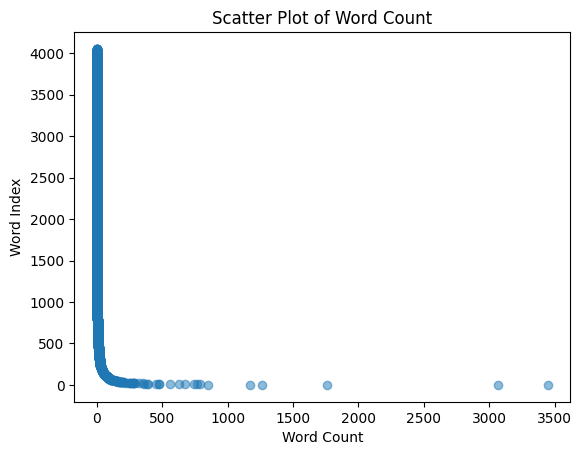

In [15]:
# Assuming wd_df contains the data with columns 'word' and 'count'
plt.scatter(wd_df['count'], range(len(wd_df)), alpha=0.5)
plt.title('Scatter Plot of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Word Index')
plt.show()

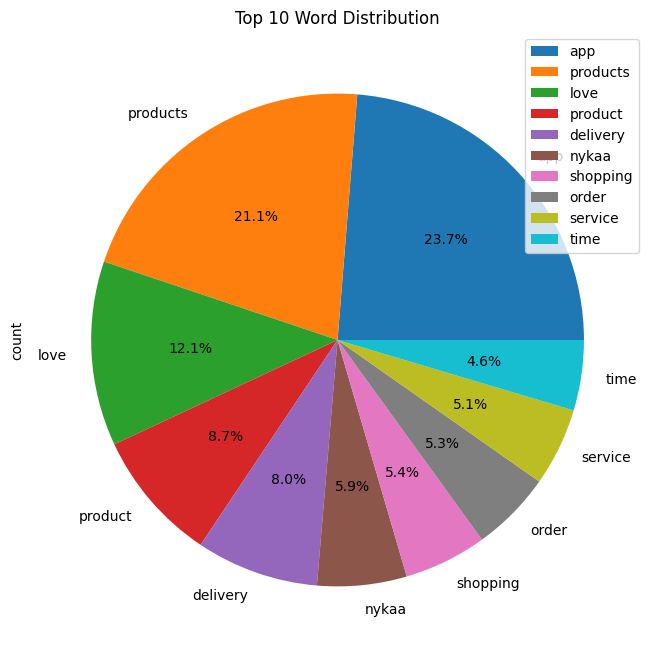

In [16]:
wd_df[0:10].plot.pie(y='count', labels=wd_df['word'], autopct='%1.1f%%', figsize=(12, 8), title='Top 10 Word Distribution')
plt.show()

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences[0:50]

['Love the offers you provide...happy wallet❤ Good app for online cosmetics products....i jst love nykaa one of the best app to buy makeup in India.',
 'should include more brands.',
 'nykaa products is too good .... no compromise for quality .. GREAT APP I LOVE IT Loved the app.',
 'The products and services are too good.',
 'Worst app ever i used.plz i m requesting to dont do shopping from this app..',
 'Loved this app n the services of Nykaa.',
 'Hassle free shopping with amazing products, good prices n fast delivery within 48 hours.',
 'Fast delivery,  packaging is good 👍👍👍👍 Happy Customer There have been multiple instances wherr I was billed incorrectly and no \nreaponse is given after raising the issue Good job😊 best app for amazing offers I love this app .',
 'Is wish the products should be in low price... Anyways...',
 'I love it.♡ good alp I love nykaa..its so reliable!!',
 'It has no option for cancellation on app I love nykaa.its ossam Awesome experience.',
 'Superfast deliv

In [23]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Love the offers you provide...happy wallet❤ Go...
1,should include more brands.
2,nykaa products is too good .... no compromise ...
3,The products and services are too good.
4,Worst app ever i used.plz i m requesting to do...
...,...
7435,More than half of your products are out of stock.
7436,Whenever I try to browse something it's out of...
7437,Always Irritating 😒 good app for all beauty it...
7438,We get a wide range of products and also got t...


In [24]:
import nltk
nltk.download('punkt')

from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(Review_text))
print(sentences[0:50])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['L o v e   t h e   o f f e r s   y o u   p r o v i d e .', '.', '.', 'h a p p y   w a l l e t ❤   G o o d   a p p   f o r   o n l i n e   c o s m e t i c s   p r o d u c t s .', '.', '.', '.', 'i   j s t   l o v e   n y k a a   o n e   o f   t h e   b e s t   a p p   t o   b u y   m a k e u p   i n   I n d i a .', 's h o u l d   i n c l u d e   m o r e   b r a n d s .', 'n y k a a   p r o d u c t s   i s   t o o   g o o d   .', '.', '.', '.', 'n o   c o m p r o m i s e   f o r   q u a l i t y   .', '.', 'G R E A T   A P P   I   L O V E   I T   L o v e d   t h e   a p p .', 'T h e   p r o d u c t s   a n d   s e r v i c e s   a r e   t o o   g o o d .', 'W o r s t   a p p   e v e r   i   u s e d .', 'p l z   i   m   r e q u e s t i n g   t o   d o n t   d o   s h o p p i n g   f r o m   t h i s   a p p .', '.', 'L o v e d   t h i s   a p p   n   t h e   s e r v i c e s   o f   N y k a a .', 'H a s s l e   f r e e   s h o p p i n g   w i t h   a m a z i n g   p r o d u c t s ,   g o o d

In [27]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [28]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [29]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [30]:
# manual testing
calculate_sentiment(text='fit')

1

In [31]:

# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       15
1        0
2        8
3        3
4       -3
        ..
7435     0
7436     0
7437     9
7438     0
7439     6
Name: sentiment_value, Length: 7440, dtype: int64

In [32]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       25
1        4
2       19
3        7
4       15
        ..
7435    10
7436    10
7437    24
7438    17
7439    12
Name: word_count, Length: 7440, dtype: int64

In [33]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
5770,Very poor..very bad..This app is disgusting......,-17,67
6551,crashes a lot nice very fast delivery service ...,-14,87
2531,😘😘😘😘☝️👌👌 Poor... Service is to bad worst app ....,-12,43
748,worst shipping..... the delivery boy can not a...,-12,47
1428,Lom em nykaa all the products are genuine.. pr...,-12,75
...,...,...,...
5049,"Its good, only if they send all the ordered pr...",45,83
4507,"However, since Nykaa provides such good servic...",46,104
3778,This is ridiculous l. Its indias largest beaut...,48,115
2339,Over all a good app Very easy to use and amazi...,51,85


In [34]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    7440.000000
mean        3.629301
std         6.264691
min       -17.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        52.000000
Name: sentiment_value, dtype: float64

In [35]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    7440.000000
mean        3.629301
std         6.264691
min       -17.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        52.000000
Name: sentiment_value, dtype: float64

In [36]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Love the offers you provide...happy wallet❤ Go...,15,25
2,nykaa products is too good .... no compromise ...,8,19
3,The products and services are too good.,3,7
5,Loved this app n the services of Nykaa.,3,8
6,"Hassle free shopping with amazing products, go...",8,14
...,...,...,...
7431,Happy customer.,3,2
7432,super awsome app💯 very prompt delivery n genui...,20,40
7433,saves time and offers many discounts.,2,6
7437,Always Irritating 😒 good app for all beauty it...,9,24


In [37]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df


,sentence,sentiment_value,word_count,index
0,Love the offers you provide...happy wallet❤ Go...,15,25,0
1,should include more brands.,0,4,1
2,nykaa products is too good .... no compromise ...,8,19,2
3,The products and services are too good.,3,7,3
4,Worst app ever i used.plz i m requesting to do...,-3,15,4
...,...,...,...,...
7435,More than half of your products are out of stock.,0,10,7435
7436,Whenever I try to browse something it's out of...,0,10,7436
7437,Always Irritating 😒 good app for all beauty it...,9,24,7437
7438,We get a wide range of products and also got t...,0,17,7438


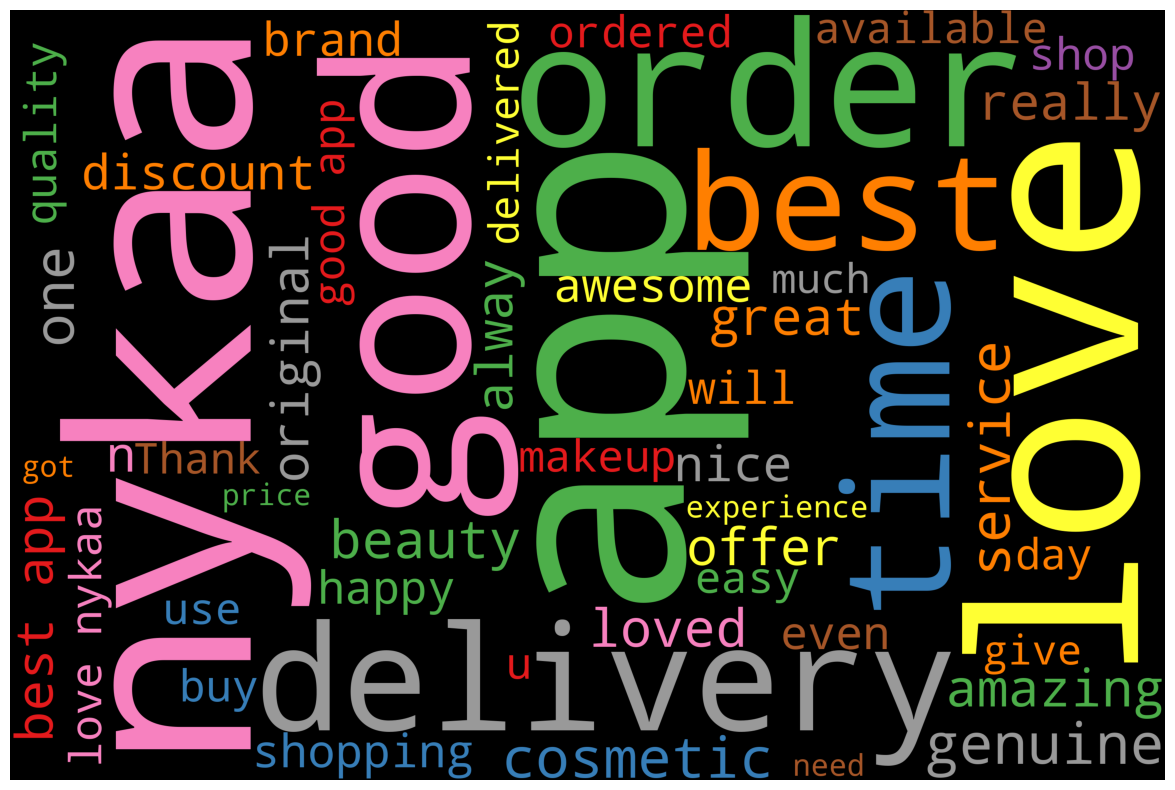

In [44]:
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('product')
STOPWORDS.add('products')

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(Review_text)
plot_cloud(wordcloud)